In [1]:
import requests
import pandas as pd
import io
import mplfinance as mpf

In [2]:
# Read API key from file
with open('api.txt', 'r') as file:
    api_key = file.read().strip()

In [3]:
# API endpoint URL
api_url = 'https://www.alphavantage.co/query'

In [4]:
# API parameters
params = {
    'function': 'TIME_SERIES_INTRADAY',
    'symbol': 'IBM',
    'interval': '5min',
    'apikey': api_key,
    'datatype': 'json'
}


In [5]:
# Make a GET request to the Alpha Vantage API
response = requests.get(api_url, params=params)

In [6]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = response.text  # Get the response content as text
    print(data)  # Print the CSV data
else:
    print(f"Request failed with status code {response.status_code}")

{
    "Meta Data": {
        "1. Information": "Intraday (5min) open, high, low, close prices and volume",
        "2. Symbol": "IBM",
        "3. Last Refreshed": "2023-06-09 16:40:00",
        "4. Interval": "5min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (5min)": {
        "2023-06-09 16:40:00": {
            "1. open": "135.3000",
            "2. high": "135.5700",
            "3. low": "135.3000",
            "4. close": "135.5700",
            "5. volume": "546"
        },
        "2023-06-09 16:25:00": {
            "1. open": "135.3000",
            "2. high": "135.3100",
            "3. low": "135.3000",
            "4. close": "135.3000",
            "5. volume": "1135"
        },
        "2023-06-09 16:15:00": {
            "1. open": "135.3000",
            "2. high": "135.3000",
            "3. low": "135.3000",
            "4. close": "135.3000",
            "5. volume": "2274"
        },
        "2023-06-09 16:10:

In [10]:
# Multiple Symbol Request
#step 1: Store Company ticker names.

symbols = ['IBM', 'AAPL', 'GOOGL']

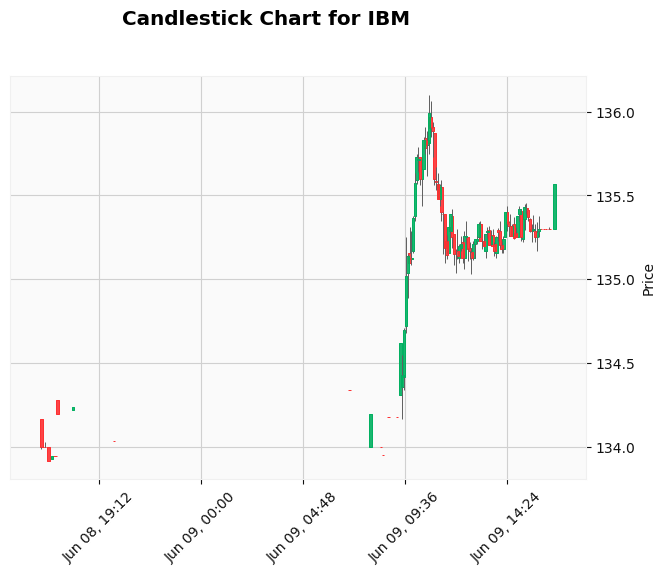

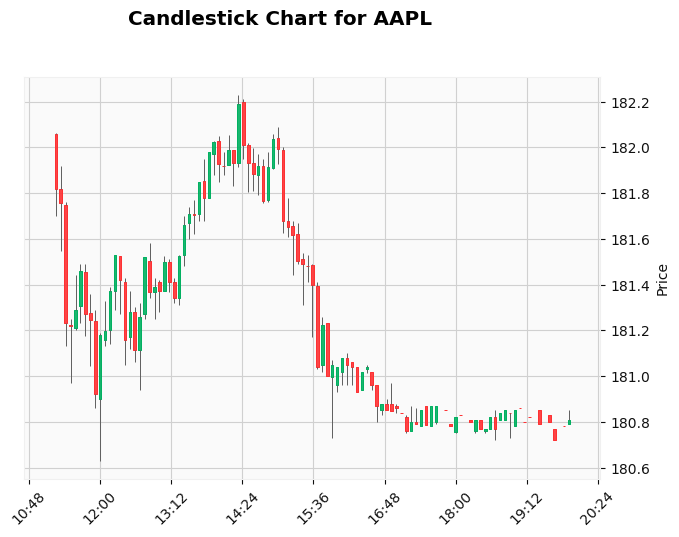

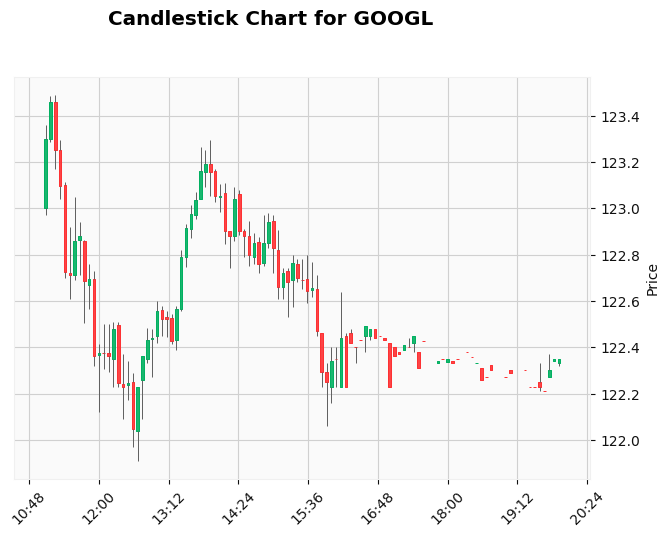

In [11]:
for symbol in symbols:
    # API parameters
    params = {
        'function': 'TIME_SERIES_INTRADAY',
        'symbol': symbol,
        'interval': '5min',
        'apikey': api_key,
        'datatype': 'csv'  # Use CSV format for easier DataFrame creation
    }

    # Make a GET request to the Alpha Vantage API
    response = requests.get(api_url, params=params)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.text  # Get the response content as text

        # Create DataFrame from CSV data
        df = pd.read_csv(io.StringIO(data))

        # Format the DataFrame
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df.set_index('timestamp', inplace=True)

        # Plot candlestick chart on a ticker
        mpf.plot(df, type='candle', title=f"Candlestick Chart for {symbol}", show_nontrading=True, style='yahoo')

    else:
        print(f"Request failed with status code {response.status_code}")